In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [92]:
df=pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [93]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [94]:
df.duplicated().sum()

np.int64(0)

In [95]:
df.shape

(398, 9)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [97]:
print(df['cylinders'].unique())


[8 4 6 3 5]


In [98]:
pd.set_option('display.max_rows', None)
print(df['horsepower'].value_counts())

horsepower
150    22
90     20
88     19
110    18
100    17
95     14
75     14
105    12
70     12
67     12
65     10
97      9
85      9
140     7
145     7
80      7
78      6
92      6
?       6
72      6
68      6
84      6
180     5
175     5
115     5
71      5
86      5
60      5
170     5
130     5
76      4
120     4
83      4
52      4
165     4
63      3
48      3
125     3
69      3
112     3
215     3
225     3
190     3
74      3
96      3
198     2
53      2
98      2
79      2
155     2
62      2
153     2
46      2
87      2
160     2
129     2
81      2
139     2
58      2
220     1
210     1
193     1
113     1
200     1
93      1
148     1
49      1
230     1
61      1
107     1
94      1
137     1
158     1
54      1
208     1
167     1
91      1
122     1
149     1
89      1
108     1
102     1
152     1
133     1
66      1
103     1
142     1
135     1
138     1
77      1
132     1
64      1
116     1
82      1
Name: count, dtype: int64


In [99]:
df['horsepower']=df['horsepower'].replace('?', np.nan)

In [100]:
df['horsepower']=pd.to_numeric(df['horsepower'])

In [101]:
print(df['horsepower'].isna().sum())

6


In [102]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [103]:
print(df['horsepower'].value_counts())

horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
95.0     14
75.0     14
105.0    12
70.0     12
67.0     12
65.0     10
97.0      9
85.0      9
140.0     7
145.0     7
80.0      7
78.0      6
92.0      6
93.5      6
72.0      6
68.0      6
84.0      6
180.0     5
175.0     5
115.0     5
71.0      5
86.0      5
60.0      5
170.0     5
130.0     5
76.0      4
120.0     4
83.0      4
52.0      4
165.0     4
63.0      3
48.0      3
125.0     3
69.0      3
112.0     3
215.0     3
225.0     3
190.0     3
74.0      3
96.0      3
198.0     2
53.0      2
98.0      2
79.0      2
155.0     2
62.0      2
153.0     2
46.0      2
87.0      2
160.0     2
129.0     2
81.0      2
139.0     2
58.0      2
220.0     1
210.0     1
193.0     1
113.0     1
200.0     1
93.0      1
148.0     1
49.0      1
230.0     1
61.0      1
107.0     1
94.0      1
137.0     1
158.0     1
54.0      1
208.0     1
167.0     1
91.0      1
122.0     1
149.0     1
89.0      1
108.0     1
102.0     1
152.0

In [104]:
df=df.drop(['car name'], axis=1)

In [105]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [106]:
from scipy.stats import skew
numeric_features = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']
skewed_feats = df[numeric_features].apply(lambda x: skew(x.dropna()))  
print(skewed_feats)

mpg             0.455342
cylinders       0.524934
displacement    0.716930
horsepower      1.102051
weight          0.529059
acceleration    0.277725
model year      0.011491
origin          0.920291
dtype: float64


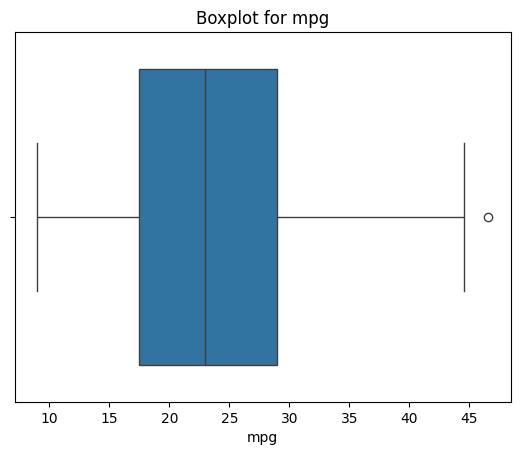

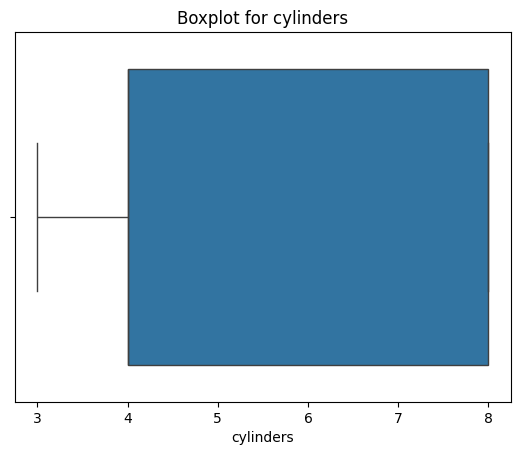

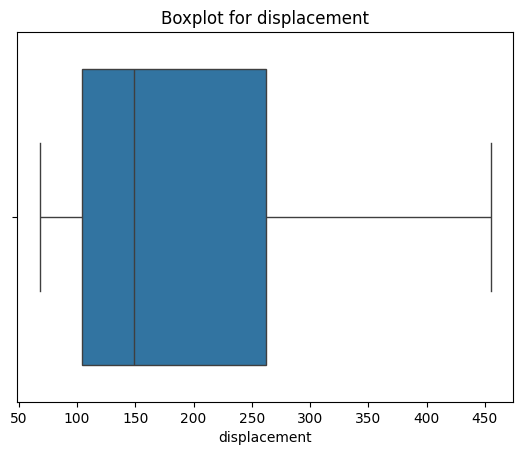

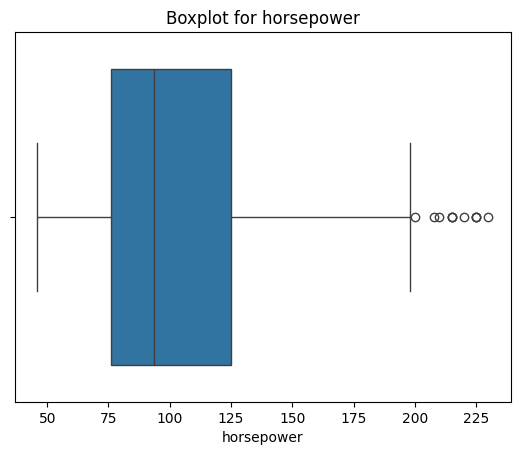

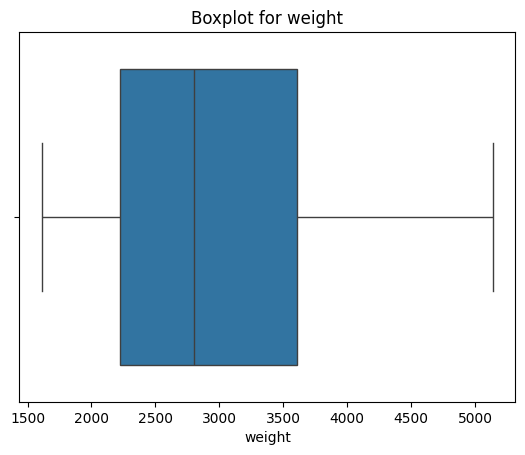

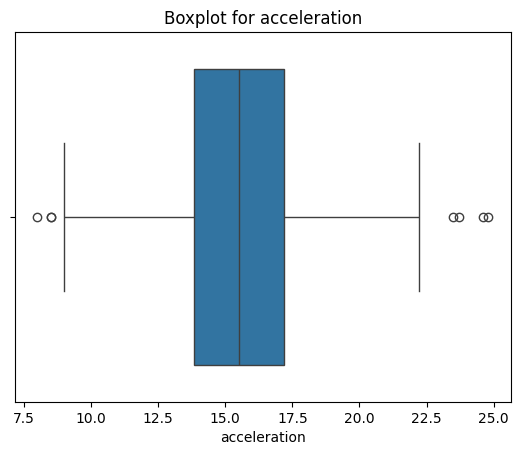

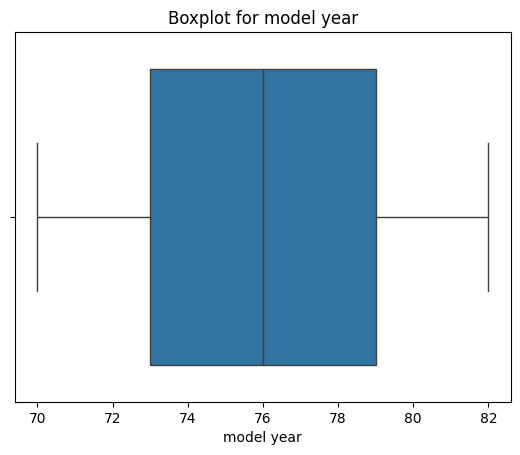

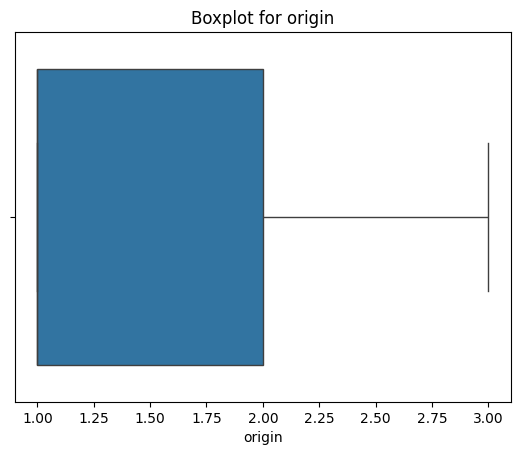

In [107]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [108]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    if not outliers.empty:
        print(f"\nOutliers in '{col}':")
        print(outliers[[col]])


Outliers in 'mpg':
      mpg
322  46.6

Outliers in 'horsepower':
     horsepower
6         220.0
7         215.0
8         225.0
13        225.0
25        215.0
26        200.0
27        210.0
67        208.0
94        215.0
95        225.0
116       230.0

Outliers in 'acceleration':
     acceleration
7             8.5
9             8.5
11            8.0
59           23.5
299          24.8
326          23.7
394          24.6


In [109]:
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

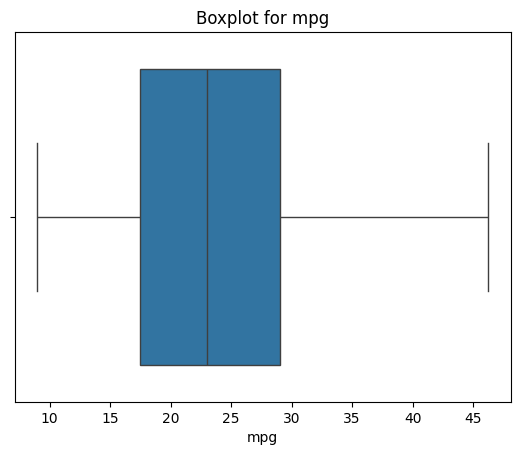

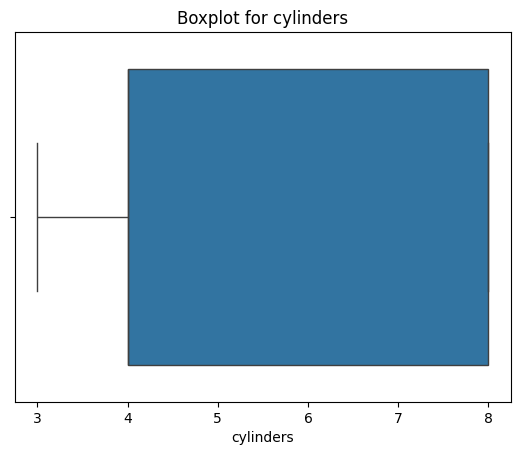

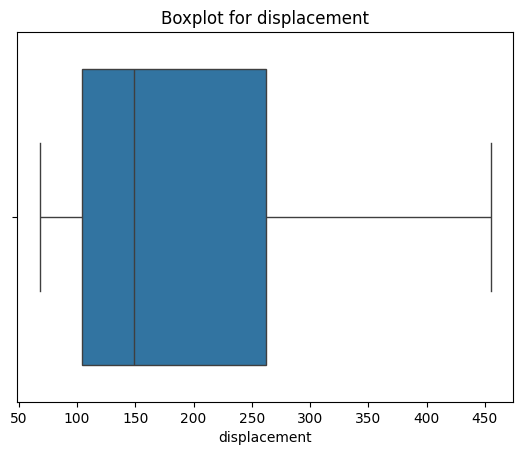

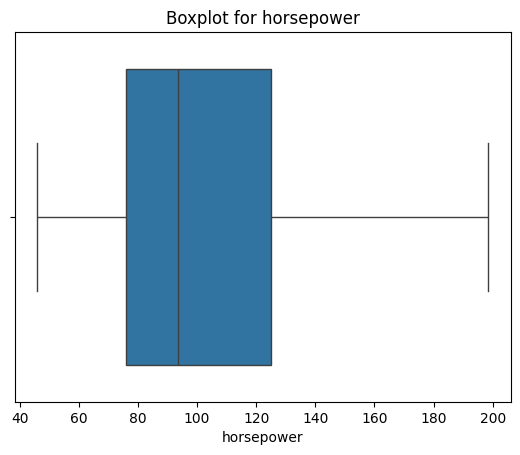

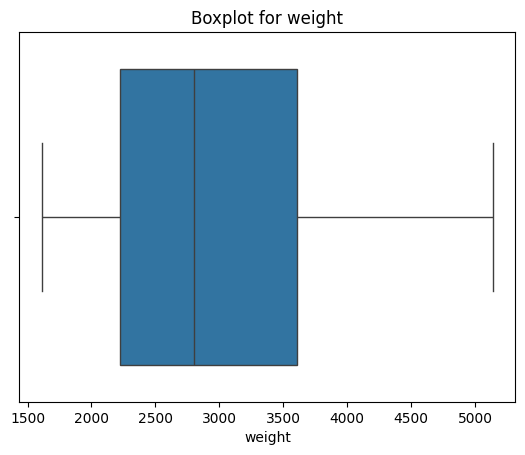

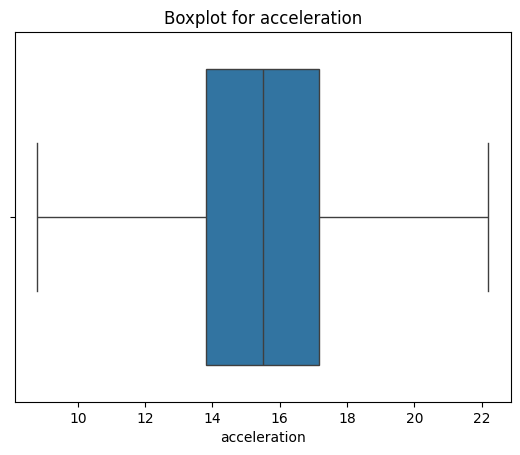

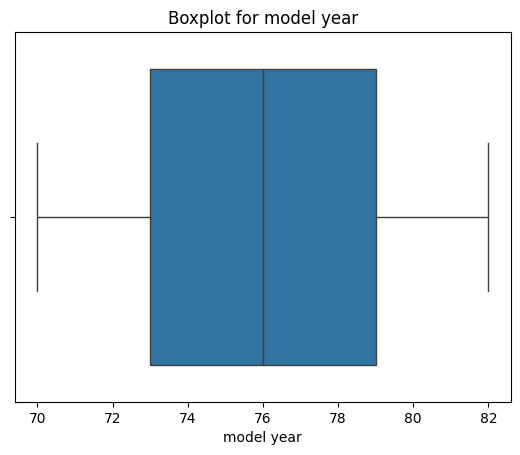

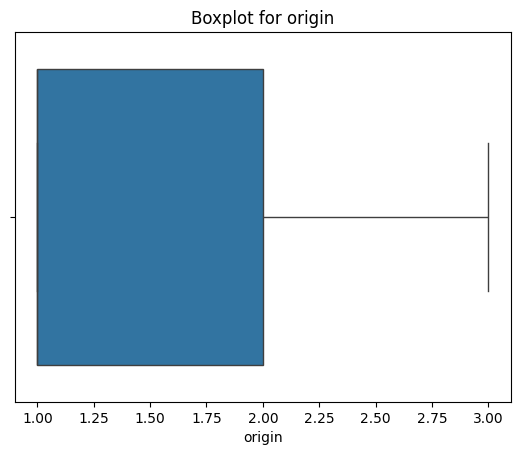

In [110]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [111]:
from sklearn.preprocessing import PowerTransformer
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75].index
pt = PowerTransformer(method='yeo-johnson') 
df[skewed_feats] = pt.fit_transform(df[skewed_feats])

In [112]:
from scipy.stats import skew
numeric_features = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']
skewed_feats = df[numeric_features].apply(lambda x: skew(x.dropna()))  
print(skewed_feats)

mpg             0.453218
cylinders       0.524934
displacement    0.716930
horsepower      0.025081
weight          0.529059
acceleration    0.163244
model year      0.011491
origin          0.572676
dtype: float64


In [113]:
X=df.drop('mpg', axis=1)
y=df['mpg']

In [114]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression")
print("R2:", r2)
print("RMSE:", rmse)

Linear Regression
R2: 0.8702997813592169
RMSE: 2.6407422270854775


In [116]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest")
print("R2:", r2)
print("RMSE:", rmse)


Random Forest
R2: 0.9123675646148255
RMSE: 2.170641473807339


In [117]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("XGBoost")
print("R2: ", r2)
print("RMSE: ", rmse)

XGBoost
R2:  0.8703817360186462
RMSE:  2.6399077823526547


In [118]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting")
print("R2:", r2)
print("RMSE:", rmse)

Gradient Boosting
R2: 0.8772625326500136
RMSE: 2.5688824679791225


In [119]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='rbf', C=100, gamma='auto')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Support Vector Regressor (SVR)")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Support Vector Regressor (SVR)
R2: 0.9244483107518315
RMSE: 2.015476531785753


In [120]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree Regressor")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Decision Tree Regressor
R2: 0.7932120998796763
RMSE: 3.3344039947192963


In [121]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Ridge Regression")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge Regression
R2: 0.8702694182618691
RMSE: 2.641051310686333


In [122]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Lasso Regression")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Lasso Regression
R2: 0.8702693741246713
RMSE: 2.641051759958172


In [123]:
from sklearn.neighbors import KNeighborsRegressor
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("K-Nearest Neighbors Regressor")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


K-Nearest Neighbors Regressor
R2: 0.9019809404820456
RMSE: 2.2956777321740955


In [124]:
import pandas as pd
data = {
    'Metric': ['R2', 'RMSE'],
    'Linear Regression': [0.8703, 2.6407],
    'Decision Tree': [0.7932, 3.3344],
    'Random Forest': [0.9124, 2.1706],
    'Gradient Boosting': [0.8773, 2.5689],
    'XGBoost': [0.8704, 2.6399],
    'KNN': [0.9020, 2.2957],
    'SVR': [0.9244, 2.0155]
}

comparison = pd.DataFrame(data)
comparison.set_index('Metric', inplace=True)
print(comparison.round(4))


        Linear Regression  Decision Tree  Random Forest  Gradient Boosting  \
Metric                                                                       
R2                 0.8703         0.7932         0.9124             0.8773   
RMSE               2.6407         3.3344         2.1706             2.5689   

        XGBoost     KNN     SVR  
Metric                           
R2       0.8704  0.9020  0.9244  
RMSE     2.6399  2.2957  2.0155  
